# übersicht im wirrwarr
- [interactive plots](#interactive-plots)

# interactive plots

In [105]:
# importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntSlider, FloatSlider, Text

import folium
from owslib.wms import WebMapService



In [106]:
#all data

df = pd.read_csv("./data/energiebilanz/E5_Bruttostromerzeugung_allgemeine_1955_2021.txt")
df = df.replace('.', None)

df2 = pd.read_csv("./data/testkraftwerk/watt.csv")


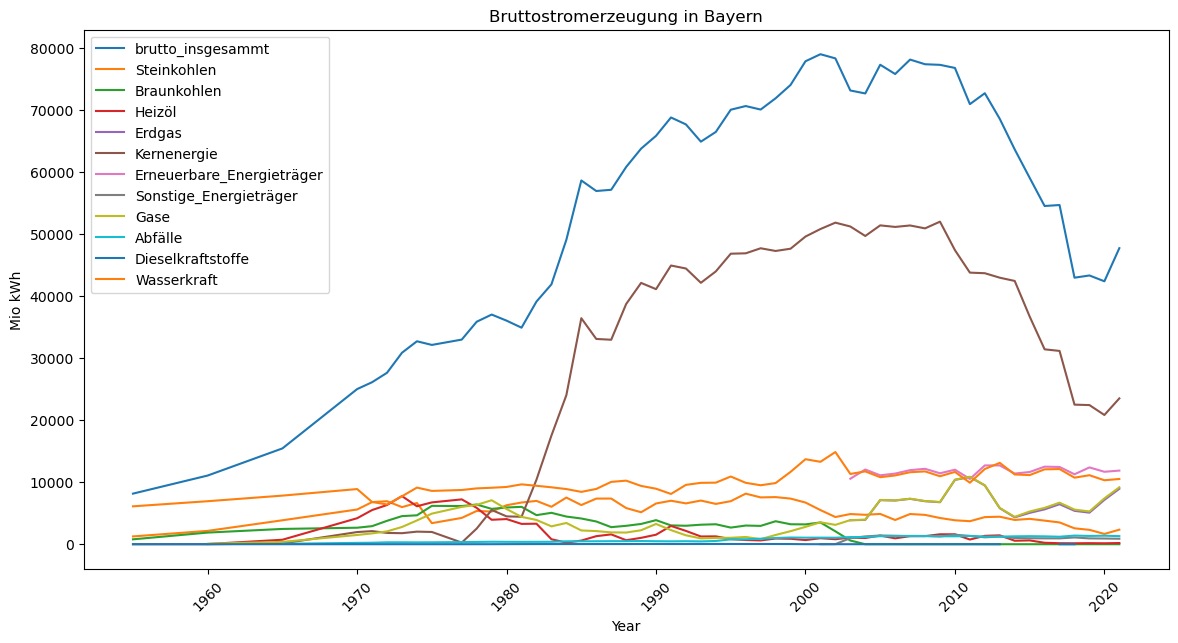

In [107]:
#plot testing
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
plt.figure(figsize=(14,7))
for i in range(1, df.shape[1]):
    plt.plot(df['Year'], df[df.columns[i]], label=df.columns[i])
plt.xlabel('Year')
plt.ylabel('Mio kWh')
plt.title('Bruttostromerzeugung in Bayern')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [108]:
#slider testing
def my_function(number_1, number_2, my_string):
    result = number_1 * number_2
    print(f'{my_string}: {result}')

interact(my_function, 
    number_1=IntSlider(min=1, max=100, step=1, value=10), 
    number_2=FloatSlider(min=1, max=10.0, step=0.5, value=5.0), 
    my_string=Text(value='Product')
)


interactive(children=(IntSlider(value=10, description='number_1', min=1), FloatSlider(value=5.0, description='…

<function __main__.my_function(number_1, number_2, my_string)>

In [109]:
import ipywidgets as widgets
from IPython.display import display

def plot_data(start_year, end_year):
    plt.figure(figsize=(14,7))

    filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

    for i in range(1, filtered_df.shape[1]):
        plt.plot(filtered_df['Year'], filtered_df[filtered_df.columns[i]], label=filtered_df.columns[i])

    plt.xlabel('Year')
    plt.ylabel('Mio kWh')
    plt.title('Energy Source Usage Over Time')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

start_year_slider = widgets.IntSlider(min=df['Year'].min(), max=df['Year'].max(), step=1, description='Start Year:', continuous_update=False)
end_year_slider = widgets.IntSlider(min=df['Year'].min(), max=df['Year'].max(), step=1, description='End Year:', continuous_update=False)

widgets.interact(plot_data, start_year=start_year_slider, end_year=end_year_slider)


interactive(children=(IntSlider(value=1955, continuous_update=False, description='Start Year:', max=2021, min=…

<function __main__.plot_data(start_year, end_year)>

In [110]:
year_range_slider = widgets.IntRangeSlider(
    value=[df['Year'].min(), df['Year'].max()],
    min=df['Year'].min(),
    max=df['Year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False
)

def plot_data(year_range):
    plt.figure(figsize=(14,7))

    filtered_df = df[(df['Year'] >= year_range[0]) & (df['Year'] <= year_range[1])]

    for i in range(1, filtered_df.shape[1]):
        plt.plot(filtered_df['Year'], filtered_df[filtered_df.columns[i]], label=filtered_df.columns[i])

    plt.xlabel('Year')
    plt.ylabel('Mio kWh')
    plt.title('Energy Source Usage Over Time')
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.show()

widgets.interact(plot_data, year_range=year_range_slider)


interactive(children=(IntRangeSlider(value=(1955, 2021), continuous_update=False, description='Year Range:', m…

<function __main__.plot_data(year_range)>

<Figure size 1400x700 with 0 Axes>

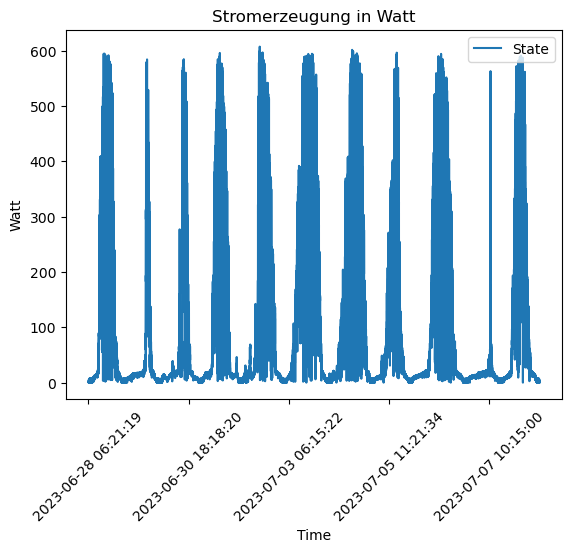

In [111]:
#plot testing
#df = df.replace('.', None)
plt.figure(figsize=(14,7))
df2.plot(x='Timestamp', y='State')
plt.xlabel('Time')
plt.ylabel('Watt')
plt.title('Stromerzeugung in Watt')
plt.xticks(rotation=45)
plt.show()

In [117]:
wms = WebMapService('https://www.lfu.bayern.de/gdi/wms/energieatlas/statistik_photovoltaik?REQUEST=GetCapabilities&SERVICE=WMS')

germany_location = [48.387011, 11.240785]
m = folium.Map(germany_location, zoom_start=7)
# folium.WmsTileLayer(
#     url=wms.url,
#     layers='anteil_pv_gem',
#     name='WMS Layer',
#     fmt='image/png',
#     transparent=True
# ).add_to(m)

layers = list(wms.contents)
for layer in layers:
    print(layer)
    folium.WmsTileLayer(
        url=wms.url,
        layers=layer,
        name=layer,
        fmt='image/png',
        transparent=True
    ).add_to(m)

m.add_child(folium.ClickForMarker(popup='position'))

# waypoint_location = None

# # Function to handle clicks on the map
# def handle_click(event, **kwargs):
#     global waypoint_location
#     waypoint_location = [event.latlng.lat, event.latlng.lng]

# # Add the click event handler to the map
# m.add_child(folium.ClickForMarker(popup='position', callback=handle_click))

folium.LayerControl().add_to(m)

m

photovoltaik_bayern
photovoltaik_leistung_pro_ha_rbz
photovoltaik_leistung_pro_ha_lkr
photovoltaik_leistung_pro_ha_gem
photovoltaik_leistung_pro_ew_rbz
photovoltaik_leistung_pro_ew_lkr
photovoltaik_leistung_pro_ew_gem
anteil_pv_rbz
anteil_pv_lkr
anteil_pv_gem
kreisefreie_staedte
staedte_uebersicht


In [114]:
wms = WebMapService('https://wirtschaft-risby.bayern.de/RisGate/servlet/Globalstrahlung')

m = folium.Map(germany_location, zoom_start=7)
folium.WmsTileLayer(
    url=wms.url,
    layers='globalstrahlung_jahr',
    name='WMS Layer',
    fmt='image/png',
    transparent=True
).add_to(m)

layers = list(wms.contents)
for layer in layers:
    print(layer)

m

globalstrahlung_dezember
globalstrahlung_november
globalstrahlung_oktober
globalstrahlung_september
globalstrahlung_august
globalstrahlung_juli
globalstrahlung_juni
globalstrahlung_mai
globalstrahlung_april
globalstrahlung_maerz
globalstrahlung_februar
globalstrahlung_januar
globalstrahlung_jahr
